# 1. Introduction to data and time

### 1.1 Importing time series data

**How to import data?**

첫번째로 커널에 필요한 모든 데이텃 셋을 import해야 합니다. 필요한 타임시리즈 columns은 parse_dates를 사용하여 datatime column으로 가져오며,
index_col을 사용하면 DataFrame index로 가져오기도 한다


In [30]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
google = pd.read_csv('stock-data/GOOGL_2006-01-01_to_2018-01-01.csv', index_col ='Date', parse_dates = ['Date'])

In [6]:
google.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [7]:
humidity = pd.read_csv('weather-data/humidity.csv')

In [8]:
humidity.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,...,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2,2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,...,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
3,2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,...,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
4,2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,...,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0


In [20]:

humidity = pd.read_csv('weather-data/humidity.csv', index_col='datetime', parse_dates = ['datetime'])

In [21]:
humidity.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN
2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,62.0,...,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,...,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,...,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,62.0,...,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0


## 1.2 Cleaning and preparing time series data

**How to prepare data?**

Googlestock data는 missing value를 가지고 있지 않지만 humidity data는 missing value를 가지고 있다. 

fillna()함수에 ffill파라미터를 사용하여 Data Cleaning을 한다

In [22]:
humidity = humidity.iloc[1:]

In [23]:
humidity.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,62.0,...,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,...,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,...,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,62.0,...,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 17:00:00,78.0,79.0,84.0,79.0,88.0,80.0,21.0,24.0,49.0,63.0,...,69.0,57.0,80.0,68.0,54.0,62.0,23.0,51.0,51.0,50.0


In [25]:
humidity.isnull().sum()

Vancouver            1825
Portland              448
San Francisco         941
Seattle               288
Los Angeles           151
San Diego             343
Las Vegas             841
Phoenix              1307
Albuquerque           709
Denver               1807
San Antonio           563
Dallas                318
Houston               120
Kansas City           511
Minneapolis           509
Saint Louis          1288
Chicago              1108
Nashville             566
Indianapolis          694
Atlanta               421
Detroit               861
Jacksonville          208
Charlotte             588
Miami                1086
Pittsburgh            521
Toronto               727
Philadelphia          623
New York             1623
Montreal             1695
Boston                448
Beersheba             858
Tel Aviv District    1112
Eilat                 970
Haifa                 817
Nahariyya             816
Jerusalem             905
dtype: int64

In [26]:
humidity = humidity.fillna(method='ffill')

In [27]:
humidity.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,62.0,...,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,...,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,62.0,...,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,62.0,...,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0
2012-10-01 17:00:00,78.0,79.0,84.0,79.0,88.0,80.0,21.0,24.0,49.0,63.0,...,69.0,57.0,80.0,68.0,54.0,62.0,23.0,51.0,51.0,50.0


## 1.3 Visualizaing the datasets

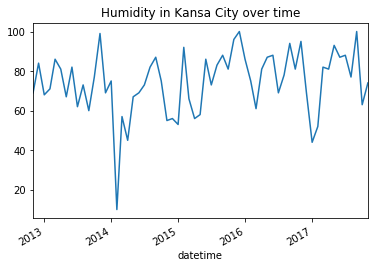

In [33]:
humidity['Kansas City'].asfreq('M').plot() # asfreq함수는 time series를 frequency로 바꿔준다
plt.title('Humidity in Kansa City over time')
plt.show()

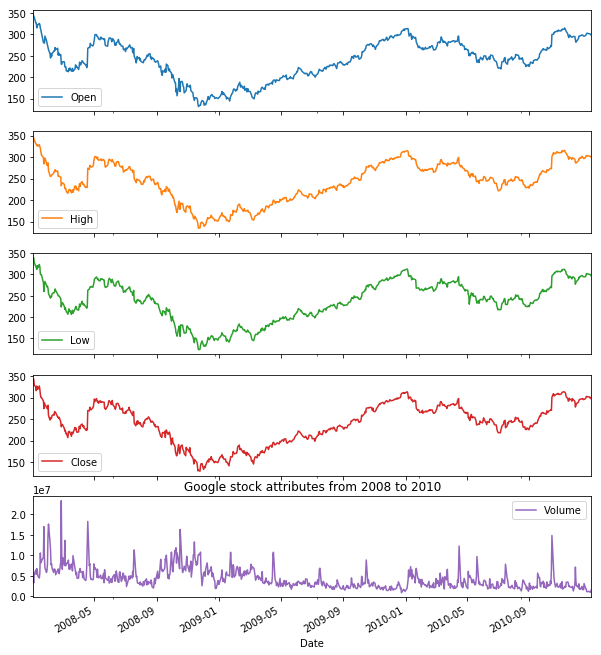

In [37]:
google['2008':'2010'].plot(subplots=True, figsize=(10, 12))
plt.title('Google stock attributes from 2008 to 2010')
plt.savefig('stocks.png')
plt.show()

## Timestamps and Periods

**What are timestamps and periods and how are they useful?**

**Timestamps**는 즉정 시점을 나타내기 위해 사용합니다.

**Periods**는 시간의 간격을 나타냅니다. 

Periods는 주어진 기간에 특정 사건이 발생하는지 확인합니다.

In [38]:
timestamp = pd.Timestamp(2017, 1, 1, 12)
timestamp

Timestamp('2017-01-01 12:00:00')

In [39]:
period = pd.Period('2017-01-01')
period

Period('2017-01-01', 'D')

In [40]:
period.start_time < timestamp < period.end_time

True

In [41]:
print(period.start_time, period.end_time)

2017-01-01 00:00:00 2017-01-01 23:59:59.999999999


In [42]:
new_period = timestamp.to_period(freq='H')
new_period

Period('2017-01-01 12:00', 'H')

In [43]:
new_timestamp = period.to_timestamp(freq='H', how='start')
new_timestamp

Timestamp('2017-01-01 00:00:00')

## 1.5 Using data_range

**What is data_range and how is it useful?**
**data_range** 는 고정된 주파수 **data time index**를 반환하는 함수이다.

기존 데이터에 대한 고유한 시계열 특성을 생성하거나,

사용자가 생성한 시계열 특성을 중심으로 데이터를 정렬할 때 유용하다

In [45]:
dr1 = pd.date_range(start='1/1/18', end = '1/9/18')
dr1

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09'],
              dtype='datetime64[ns]', freq='D')

In [46]:
dr2 = pd.date_range(start='1/1/18', end='1/1/19', freq='M')
dr2

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31'],
              dtype='datetime64[ns]', freq='M')

In [47]:
dr3 = pd.date_range(end='1/4/2014', periods=8)
dr3

DatetimeIndex(['2013-12-28', '2013-12-29', '2013-12-30', '2013-12-31',
               '2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04'],
              dtype='datetime64[ns]', freq='D')

In [49]:
dr4 = pd.date_range(start='2013-04-24', end='2014-11-27', periods = 3)
dr4

DatetimeIndex(['2013-04-24', '2014-02-09', '2014-11-27'], dtype='datetime64[ns]', freq=None)

## 1.6 Using to_datetime

**pandas_to_datetime()** 을 사용하면 argument를 datetime으로 변환할수 있습니다.

In [50]:
df = pd.DataFrame({'year': [2015, 2016], 'month':[2, 3], 'day':[4, 5]})
df

,year,month,day
0,2015,2,4
1,2016,3,5


In [51]:
df = pd.to_datetime(df)
df

0   2015-02-04
1   2016-03-05
dtype: datetime64[ns]

In [53]:
df = pd.to_datetime('01-01-2017')
df

Timestamp('2017-01-01 00:00:00')

## 1.7 Shifiting and lags

시간 주파수를 원하는 주기로 바꿀수 있다. 

이건 과거 시계열 데이터와 비교할 때 유용하다

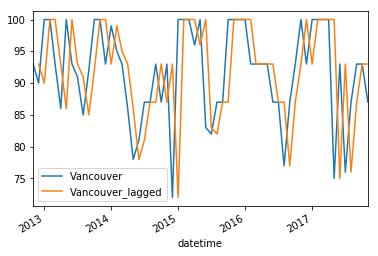

In [63]:
humidity['Vancouver'].asfreq('M').plot(legend=True)
shifted = humidity["Vancouver"].asfreq('M').shift(1).plot(legend=True)
shifted.legend(['Vancouver', 'Vancouver_lagged'])
plt.show()

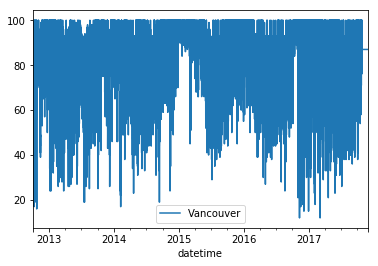

In [57]:
humidity['Vancouver'].plot(legend=True)

## 1.8 Resampling

**Upsampling** : 시계열 데이터는 저주파에서 고주파로 resampling된다. 이것은 missing data를 채우는것 또는 interpolation을 포함한다.

**Downsampling** : 시계열 데이터는 고주파에서 저주파로 reampling된다. 이것은 기존 데이터의 집합을 포함한다.

In [ ]:
pressure = pd.read_csv('weather-data/')